MACD - wskaźnik zbieżności/rozbieżności średnich kroczących (ang. moving average convergence/divergence)

$$MACD = EMA_{12}-EMA_{26}$$

EMA - wykładnicza średnia krocząca (ang. exponential moving average)

**Obliczana jest ze wzoru (rekurenycjnie):**
$$EMA_N(i) = \alpha * x_i + (1- \alpha) * EMA_N(i-1)$$

**Postać jawna:**
$$EMA_N(i) = \frac{x_1 + (1-\alpha)x_{i-1} + (1-\alpha)^2 x_{i-2} + ... + (1-\alpha)^N x_{i-N}}{1+ (1 - \alpha) + (1 - \alpha)^2 + ... + + (1 - \alpha)^N}$$

Gdzie:
- $x_i$ - cena zamknięcia w i-tym przedziale czasowym
- $N$ - liczba okresów
- $\alpha = \frac{2}{N+1}$ - współczynnik wygładzania

**ALGORYTM**
1. Wczytać dane z pliku CSV (cena zamknięcia)
2. Obliczyć EMA dla 12 okresów
3. Obliczyć EMA dla 26 okresów
4. Wyznaczyć krzywą MACD jako różnicę EMA(12) i EMA(26)
5. Wyznaczyć linię SIGNAL jako 9-okresową wykładniczą średnią kroczącą krzywej MACD
6. Wyznaczyć przecięcia krzywej MACD i linii SIGNAL
    - jeśli krzywa MACD przecina linię SIGNAL od dołu to sygnał kupna
    - jeśli krzywa MACD przecina linię SIGNAL od góry to sygnał sprzedaży
    - w sytuacji, gdy przecięcie występuje pomiędzy i-tym okresem oraz i+1 okresem, to sygnał kupna/sprzedaży występuje w i+1 okresie
7. Wyznaczyć histogram jako różnicę krzywej MACD i linii SIGNAL

**Funkcje do zaimplementowania**
1. [x] `ema(data, N)` - funkcja zwracająca EMA dla N okresów
2. [x] `macd(data)` - funkcja zwracająca MACD
3. [x] `signal(data)` - funkcja zwracająca linię SIGNAL
4. [x] `cross(data)` - funkcja zwracająca sygnały kupna i sprzedaży
5. [x] `histogram(data)` - funkcja zwracająca histogram
6. [x] `plot(data)` - funkcja rysująca wykres z ceną zamknięcia, MACD, linią SIGNAL, histogramem oraz sygnałami kupna i sprzedaży
7. [ ] `backtest(data)` - funkcja zwracająca zysk z inwestycji


Możliwe do używania biblioteki:
- pandas
- numpy
- matplotlib

**Zadania do wykonania**

1. [x] Zapoznaj się z teorią wskaźnika MACD (korzystając zarówno z niniejszej instrukcji, jak i z innych dostępnych źródeł).
2. [x] Wybierz dane wejściowe zapisane w pliku *.csv zawierające około 1000 elementów. Mogą to być historyczne wartości indeksu WIG20, dane z rynku FOREX, notowania kryptowalut, obligacji, surowców itp.
3. [x] Należy zaimplementować w języku Python wyznaczanie wartości wskaźnika MACD (bez korzystania z bibliotek, które już go udostępniają). Do wczytania danych w formacie *.csv można użyć biblioteki pandas. W ramach tego zadania należy opracować i zinterpretować co najmniej dwa wykresy wykonane dla wybranego zestawu danych (zawierającego ok. 1000 elementów):
    - wykres notowań analizowanego instrumentu finansowego,
    - wykres zawierający: a) MACD, b) SIGNAL, c) punkty kupna i sprzedaży oznaczone różnymi symbolami lub kolorami. *Liczba punktów za zadanie: 2.*
4. [ ] Następnie należy ocenić, czy wskaźnik MACD może być pomocny przy podejmowaniu decyzji o kupnie i sprzedaży wybranego instrumentu finansowego. W tym celu trzeba przedstawić i zinterpretować co najmniej dwa wykresy przedstawiające transakcje kupna-sprzedaży. Każdy z tych wykresów powinien ilustrować jedną lub dwie wyraźnie zaznaczone transakcje kupna-sprzedaży oraz od czterech do ośmiu przecięć MACD i SIGNAL. W sprawozdaniu należy przedstawić analizę zilustrowanych transakcji wraz ze wskazaniem wartości zysku lub straty każdej z nich. *Liczba punktów za zadanie: 3.*
5. [ ] Kolejne zadanie wymaga opracowania programu, który automatycznie, na podstawie wskaźnika MACD, podejmuje decyzje o kupnie lub sprzedaży wybranego instrumentu finansowego. Symulację działania tego programu należy przeprowadzić rozpoczynając od kapitału początkowego wynoszącego 1000 jednostek wybranego instrumentu finansowego. Symulację należy przeprowadzić dla całości danych wejściowych (nie należy uwzględniać tych próbek, dla których wartość MACD lub SIGNAL nie jest prawidłowo wyznaczona). Głównym rezultatem działania programu ma być końcowy kapitał inwestora. Otrzymane rezultaty symulacji należy przeanalizować i zinterpretować w sprawozdaniu. Częścią tej analizy powinno być przedstawienie wykresu, który ilustruje jak zmienia się wartość portfela inwestycyjnego (suma gotówki oraz wyceny posiadanych instrumentów finansowych) po kolejnych transakcjach. Dodatkowo, należy opisać ile z przeprowadzonych transakcji zakończyło się zyskiem a ile stratą wraz z oceną skuteczności zastosowania MACD do przeprowadzania transakcji finansowych. Przedstawione wnioski można uzasadnić dodając kolejne wykresy ilustrujące transakcje. *Liczba punktów za zadanie: 2.*
 6. [ ] *Za wstęp i podsumowanie można uzyskać maksymalnie po 1,5 punktu.*

**Sprawozdanie**
- [ ] W sprawozdaniu należy przedstawić wnioski, uzasadnić przydatność lub brak przydatności MACD w analizie technicznej, wskazać miejsca na wykresach, gdzie MACD pomaga lub zawodzi. Sprawozdanie w formacie PDForaz kod źródłowy należy umieścić w pliku zip, który należy przesłać na platformę eNauczanie na stronie pro1.

-----

### Used libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

### Function to save plot

In [2]:
def save_plot(filename):
    """
    Save the plot as a PNG file
    Parameters
    ----------
    filename : str, the filename to save the plot as
    """
    plt.savefig(filename)

### Extracting data

In [3]:
def extract_data():
    """
    Extract the 'Data' and 'Zamkniecie' columns from the CSV file
    Returns
    -------
    data : pandas.DataFrame, the extracted data from the CSV file with 'Data' and 'Zamkniecie' columns
    """
    # Load the CSV file
    df = pd.read_csv('wig20_d.csv')

    # Convert the 'Data' column to datetime format
    df['Data'] = pd.to_datetime(df['Data'])

    # Extract the 'Data' and 'Zamkniecie' columns
    data_from_file = df[['Data', 'Zamkniecie']]

    return data_from_file

In [4]:
data = extract_data()
print(data) # Print the data

# Extract the 'Zamkniecie' column
closing_prices = data['Zamkniecie'].values

           Data  Zamkniecie
0    2020-10-01     1694.18
1    2020-10-02     1697.39
2    2020-10-05     1731.85
3    2020-10-06     1735.45
4    2020-10-07     1736.61
...         ...         ...
1107 2025-03-06     2638.92
1108 2025-03-07     2642.59
1109 2025-03-10     2589.87
1110 2025-03-11     2584.04
1111 2025-03-12     2626.79

[1112 rows x 2 columns]


### Plotting data

In [5]:
def plot_data(data):
    plt.figure(figsize=(28, 7))
    plt.plot(data['Data'], data['Zamkniecie'], label='Closing Prices', color='black')

    # Set the x-axis to display dates only at the start of each month
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

    # Rotate the x-axis labels to be vertical
    plt.xticks(rotation=90)

    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Closing Prices')
    plt.legend()
    # save_plot('graphs/closing_prices.png')
    plt.show()

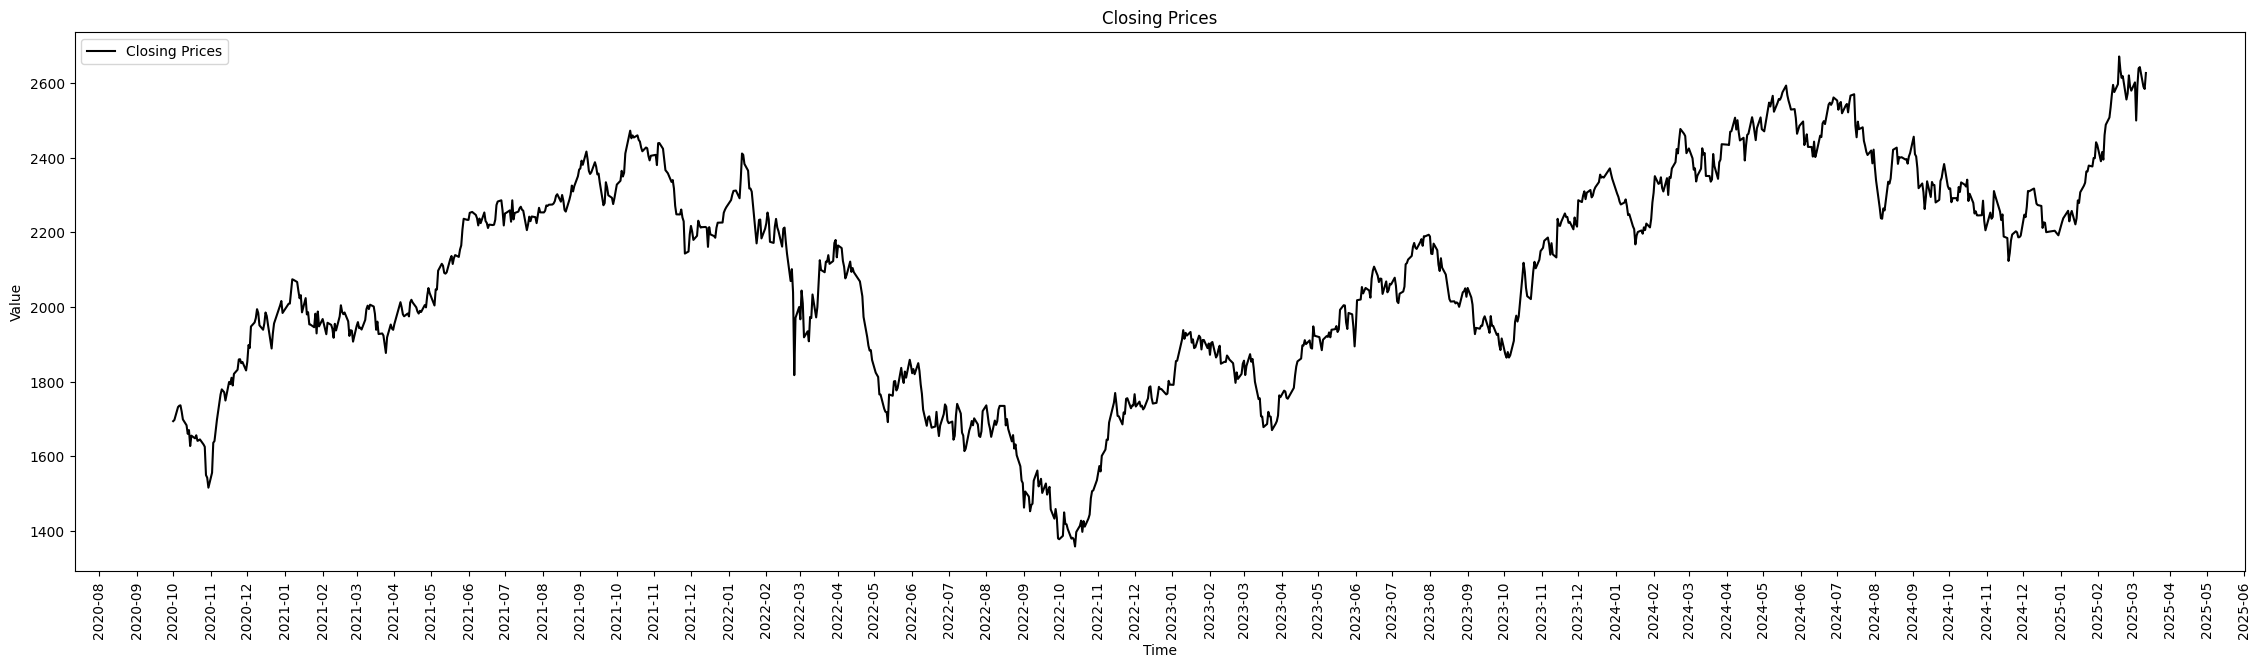

In [6]:
plot_data(data)

### Calculating EMA

In [7]:
def calculate_ema(_data, _n):
    """
    Calculate the Exponential Moving Average (EMA) of a given data set for the last n periods
    Parameters
    ----------
    _data : list of float or int from newest (at index=0) to oldest (at index=n-1)
    _n : int, the number of periods to consider in the EMA calculation

    Returns
    -------
    numpy array of EMA values
    should return values for each data point in the given period
    """
    alpha = 2 / (_n + 1)  # Calculate the smoothing factor alpha, 2/(N+1)

    # Calculate the EMA
    ema_values = []  # Create an array to store the EMA values

    # Initialize the first EMA value as the first data point
    ema_values.append(_data[0])

    for i in range(_n, len(_data)):
        # Calculate the exponential average by using the formula
        # EMA = (alpha * current price) + (1 - alpha) * EMA of the previous day
        window_average = round((alpha * _data[i]) + (1 - alpha) * ema_values[-1], 2)

        # Store the cumulative average of current window in moving average list
        ema_values.append(window_average)

    return ema_values

In [8]:
# Calculate the EMA_26
ema26 = calculate_ema(closing_prices, 26)

# Calculate the EMA_12
ema12 = calculate_ema(closing_prices, 12)

# Print the EMA values as regular floats
for value in ema26:
    print(float(value))
print(len(ema26))

for value in ema12:
    print(float(value))
print(len(ema12))

1694.18
1694.43
1699.71
1705.61
1710.49
1713.37
1719.71
1725.18
1731.49
1735.81
1742.11
1748.77
1756.97
1764.61
1770.9
1776.96
1780.89
1786.26
1794.53
1801.61
1812.43
1823.25
1834.14
1845.99
1856.21
1863.22
1868.84
1875.27
1883.42
1890.26
1894.87
1894.42
1896.94
1901.3
1908.94
1916.87
1921.84
1928.28
1934.27
1944.63
1954.12
1962.48
1968.5
1972.56
1976.94
1977.59
1981.01
1980.94
1981.32
1979.26
1977.29
1974.96
1975.48
1972.05
1973.22
1971.35
1971.08
1969.82
1967.66
1964.65
1964.14
1963.25
1961.65
1958.38
1958.12
1956.56
1957.91
1961.36
1963.24
1964.54
1966.08
1965.75
1962.55
1960.72
1958.92
1955.09
1954.68
1955.04
1954.17
1953.48
1952.45
1953.4
1956.42
1959.91
1962.46
1965.69
1968.32
1969.29
1967.05
1966.58
1963.69
1961.13
1958.35
1954.02
1948.3
1946.11
1946.62
1946.3
1945.75
1946.39
1951.31
1954.82
1956.71
1958.07
1959.89
1960.99
1964.77
1968.81
1972.03
1974.03
1975.05
1975.59
1976.64
1977.38
1979.43
1980.87
1984.48
1989.38
1992.95
1993.77
1997.74
2001.36
2008.47
2016.41
2023.38
2028.4

### Calculating MACD

In [9]:
def pad_ema(ema, length):
    """
    Pad the EMA values with None to match the length of the data
    Parameters
    ----------
    ema
    length

    Returns
    -------
    list of EMA values padded with None
    """
    return [None] * (length - len(ema)) + ema

def calculate_macd(_data, n1=12, n2=26):
    """
    Calculate the Moving Average Convergence Divergence (MACD) of a given data set
    Parameters
    ----------
    _data : list of float or int from newest (at index=0) to oldest (at index=n-1)
    N1 : int, the number of periods to consider in the EMA calculation for EMA1
    N2 : int, the number of periods to consider in the EMA calculation for EMA2

    Returns
    -------
    numpy array of MACD values
    should return values for each data point in the given period
    """
    # Calculate the EMA for N1 periods
    ema12 = calculate_ema(_data, n1)

    # Calculate the EMA for N2 periods
    ema26 = calculate_ema(_data, n2)

    max_length = max(len(ema12), len(ema26))
    ema12 = pad_ema(ema12, max_length)
    ema26 = pad_ema(ema26, max_length)

    # Calculate the MACD as the difference between the two EMAs
    macd_values = [e1 - e2 if e1 is not None and e2 is not None else None for e1, e2 in zip(ema12, ema26)]
    # zip() pairs the elements into tuples
    # e1 - e2 calculates the difference between the two elements in each tuple
    # if e1 is not None and e2 is not None else None checks if both elements are not None
    # if they are not None, it calculates the difference, otherwise it returns None

    #macd_values = np.array(ema1) - np.array(ema2)

    macd_values = macd_values[n2-n1:]
    macd_values = np.array(macd_values)
    return macd_values

In [10]:
# Calculate the MACD
macd = calculate_macd(closing_prices)

# Print the MACD values as regular floats
print("MACD values:")
for value in macd:
    print(float(value))
print("Length of macd",len(macd))

MACD values:
-73.99000000000001
-62.350000000000136
-47.069999999999936
-33.47999999999979
-23.069999999999936
-16.409999999999854
-7.0499999999999545
-0.07000000000016371
6.75
10.360000000000127
15.550000000000182
20.329999999999927
26.029999999999973
30.25999999999999
32.38999999999987
33.930000000000064
32.94999999999982
33.66000000000008
37.40000000000009
39.27000000000021
44.87999999999988
49.63000000000011
53.7199999999998
58.22000000000003
60.27999999999997
58.559999999999945
55.600000000000136
53.98000000000002
54.44999999999982
53.440000000000055
50.190000000000055
41.98000000000002
38.23000000000002
37.049999999999955
39.569999999999936
42.02000000000021
40.91000000000008
41.549999999999955
41.59999999999991
46.34999999999991
49.440000000000055
50.83999999999992
49.5
46.25999999999999
43.8599999999999
37.81000000000017
35.67000000000007
30.11999999999989
25.90000000000009
19.690000000000055
14.539999999999964
9.789999999999964
8.839999999999918
3.7899999999999636
4.4600000000

### Calculating SIGNAL

In [11]:
def calculate_signal(_macd, n3=9):
    """
    Calculate the Signal Line of the MACD
    Parameters
    ----------
    _macd : numpy array of MACD values

    Returns
    -------
    numpy array of Signal Line values
    should return values for each data point in the given period
    """
    # Calculate the EMA for 9 periods
    signal_line = calculate_ema(_macd, n3)
    signal_line = np.array(signal_line)

    return signal_line

In [12]:
# Calculate the Signal Line
signal = calculate_signal(macd)

# Print the Signal Line values as regular floats
print("Signal values:")
for value in signal:
    print(float(value))
print("Length of signal",len(signal))

Signal values:
-73.99000000000001
-57.12
-42.59
-30.01
-18.8
-8.99
-0.71
6.22
11.57
15.99
20.27
24.07
28.23
32.51
36.75
41.04
44.89
47.62
49.22
50.17
51.03
51.51
51.25
49.4
47.17
45.15
44.03
43.63
43.09
42.78
42.54
43.3
44.53
45.79
46.53
46.48
45.96
44.33
42.6
40.1
37.26
33.75
29.91
25.89
22.48
18.74
15.88
13.06
10.69
8.48
6.26
3.92
2.1
0.61
-0.76
-2.37
-3.44
-4.39
-4.61
-3.87
-2.84
-1.78
-0.68
0.02
-0.2
-0.73
-1.45
-2.72
-3.58
-3.98
-4.32
-4.56
-4.81
-4.62
-3.7
-2.21
-0.58
1.23
2.99
4.3
4.57
4.51
3.71
2.5
1.0
-0.97
-3.51
-5.59
-6.72
-7.34
-7.66
-7.5
-6.1
-4.21
-2.39
-0.79
0.71
1.94
3.52
5.35
7.12
8.53
9.44
9.88
10.1
10.1
10.23
10.31
10.83
11.9
13.03
13.57
14.37
15.25
16.91
19.22
21.7
23.79
25.45
26.74
28.25
29.88
31.09
32.15
33.12
33.83
34.57
35.4
36.83
38.94
41.23
43.42
45.64
47.69
49.29
50.27
50.39
50.14
49.37
48.65
47.52
46.01
44.02
41.87
39.62
37.36
35.33
34.1
33.5
33.31
32.87
31.59
30.29
29.0
27.83
26.24
25.33
24.02
22.74
21.56
20.6
19.84
19.08
18.27
16.6
14.69
13.02
11.37
9.99
8

### Plotting MACD and SIGNAL

In [13]:
def plot_macd_and_signal(macd, signal):
    plt.figure(figsize=(28, 7))
    plt.plot(macd, label='MACD', color='red')
    plt.plot(signal, label='Signal Line', color='blue')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('MACD and Signal Line')
    plt.legend()
    plt.show()

def plot_histogram(macd, signal):
    # Calculate the histogram
    histogram = macd[:len(signal)] - signal
    plt.figure(figsize=(28, 7))
    plt.bar(range(len(histogram)), histogram, label='Histogram', color='green', alpha=1)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Histogram')
    plt.legend()
    plt.show()

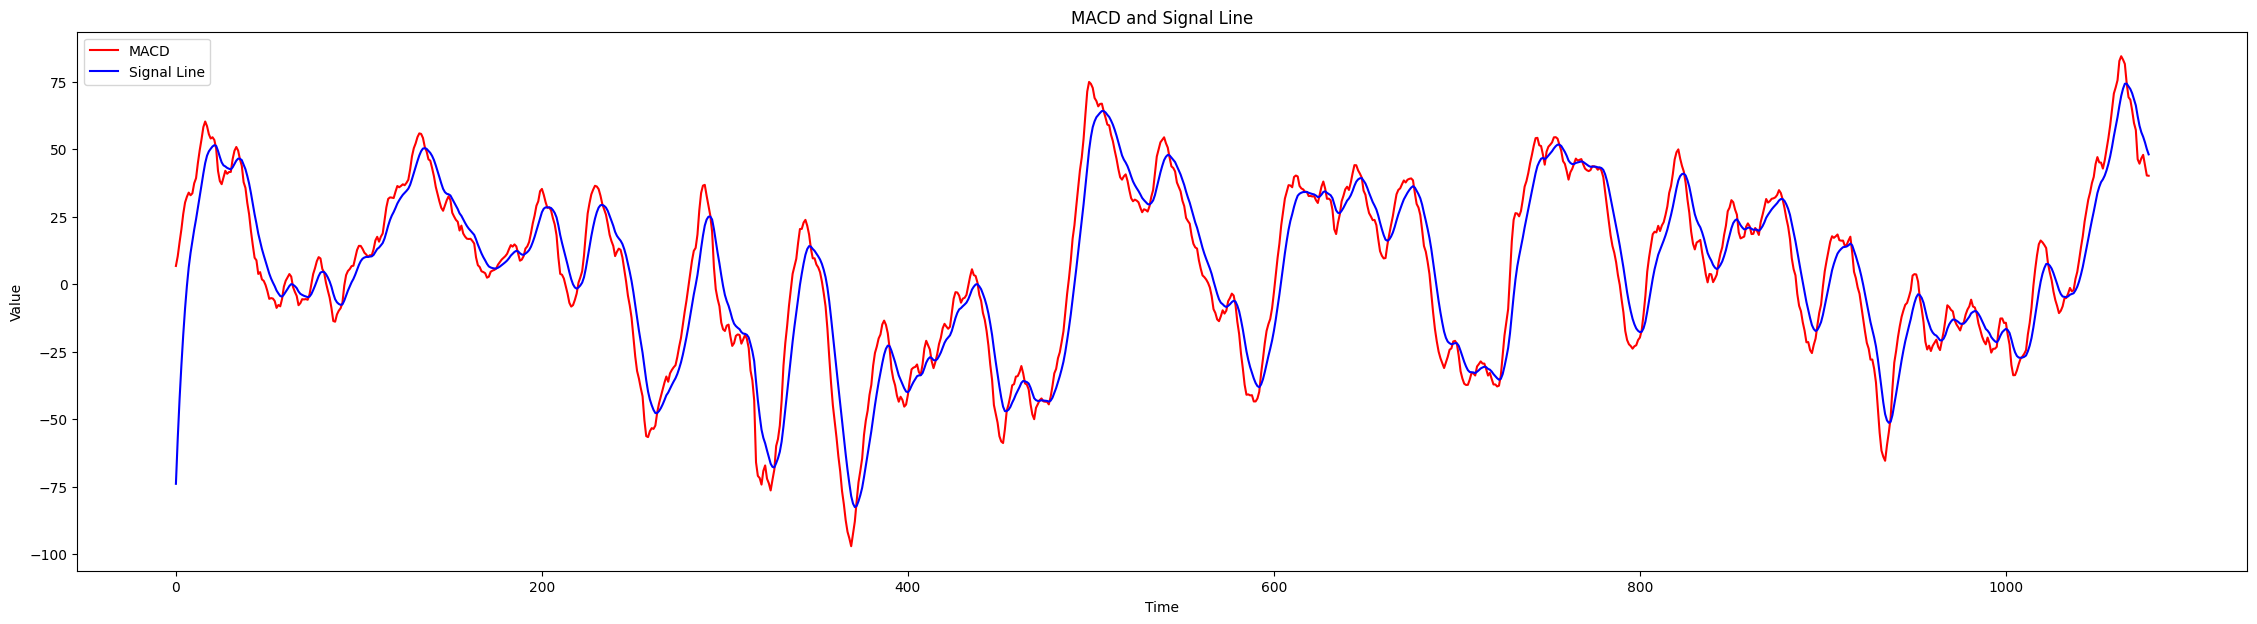

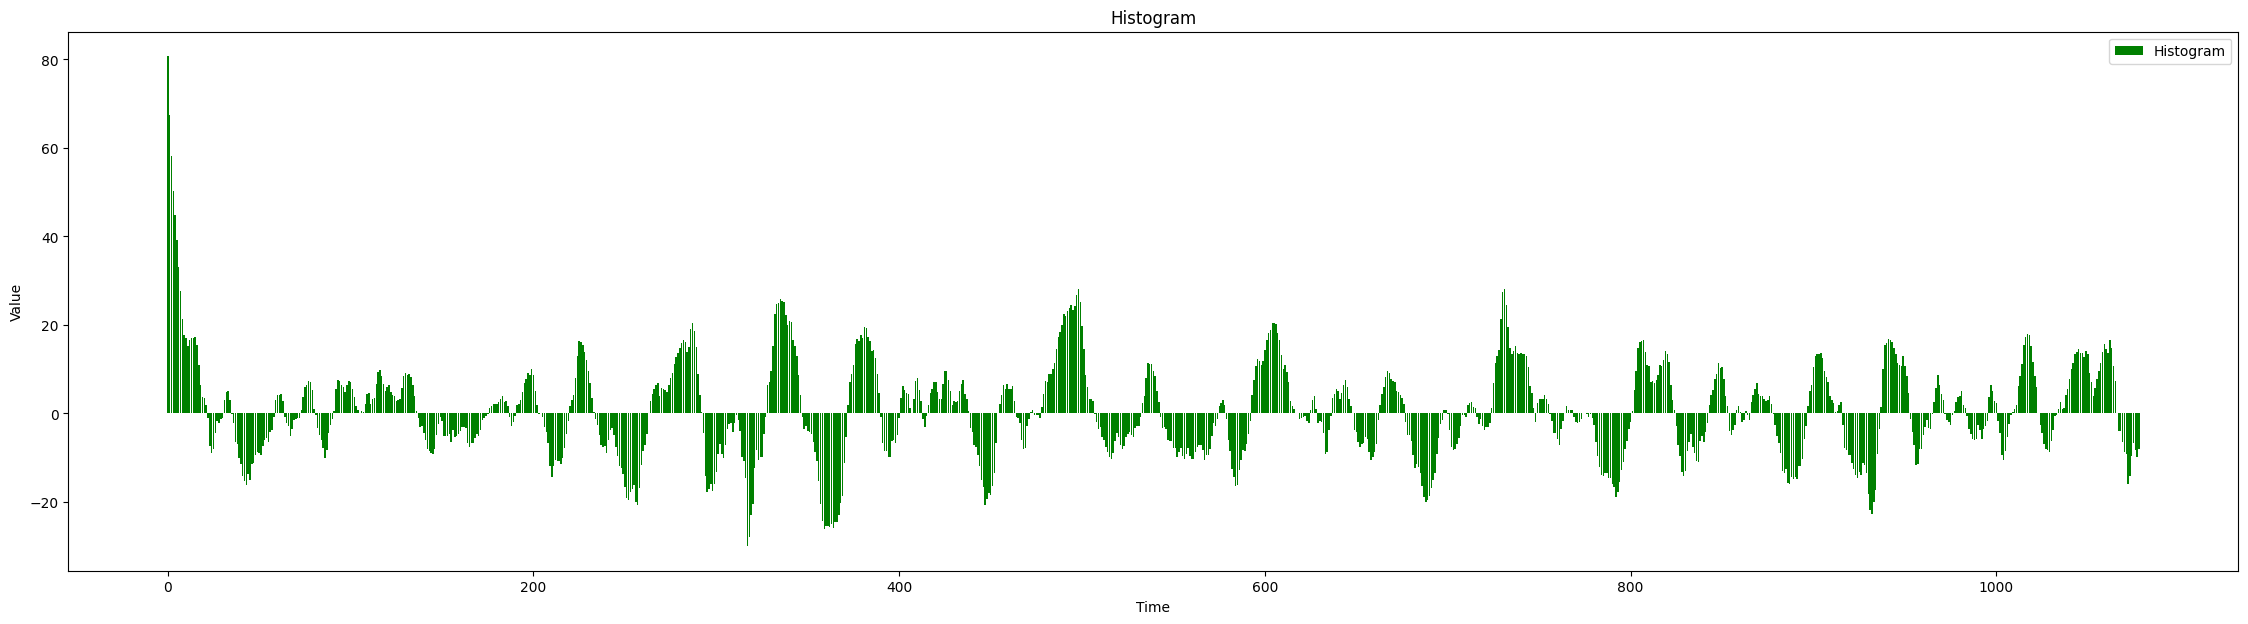

In [14]:
# to make macd and signal the same length
macd = macd[len(macd) - len(signal):]

# Plot the data
plot_macd_and_signal(macd, signal)

# Plot the histogram
plot_histogram(macd, signal)

### Calculating and plotting cross points

1. Calculate all the cross points between the MACD and Signal Line

In [15]:
def cross(macd, signal):
    """
    Calculate the cross points between the MACD and Signal Line
    Parameters
    ----------
    macd : numpy array of MACD values
    signal : numpy array of Signal Line values

    Returns
    -------
    list of tuples containing the index and value of the cross points
    """
    cross_points = []
    for i in range(1, len(macd)):
        if (macd[i] > signal[i] and macd[i - 1] < signal[i - 1]) or (macd[i] < signal[i] and macd[i - 1] > signal[i - 1]):
            cross_points.append((i, macd[i]))
    return cross_points

In [16]:
# Calculate the cross points
cross_points = cross(macd, signal)

In [17]:
def plot_macd_signal_and_cross_points(macd, signal, cross_points):
    plt.figure(figsize=(28, 7))
    plt.plot(macd, label='MACD', color='red')
    plt.plot(signal, label='Signal Line', color='blue')
    plt.scatter([point[0] for point in cross_points], [point[1] for point in cross_points], color='green', marker='o', label='Cross Points')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('MACD, Signal Line, and Cross Points')
    plt.legend()
    plt.show()

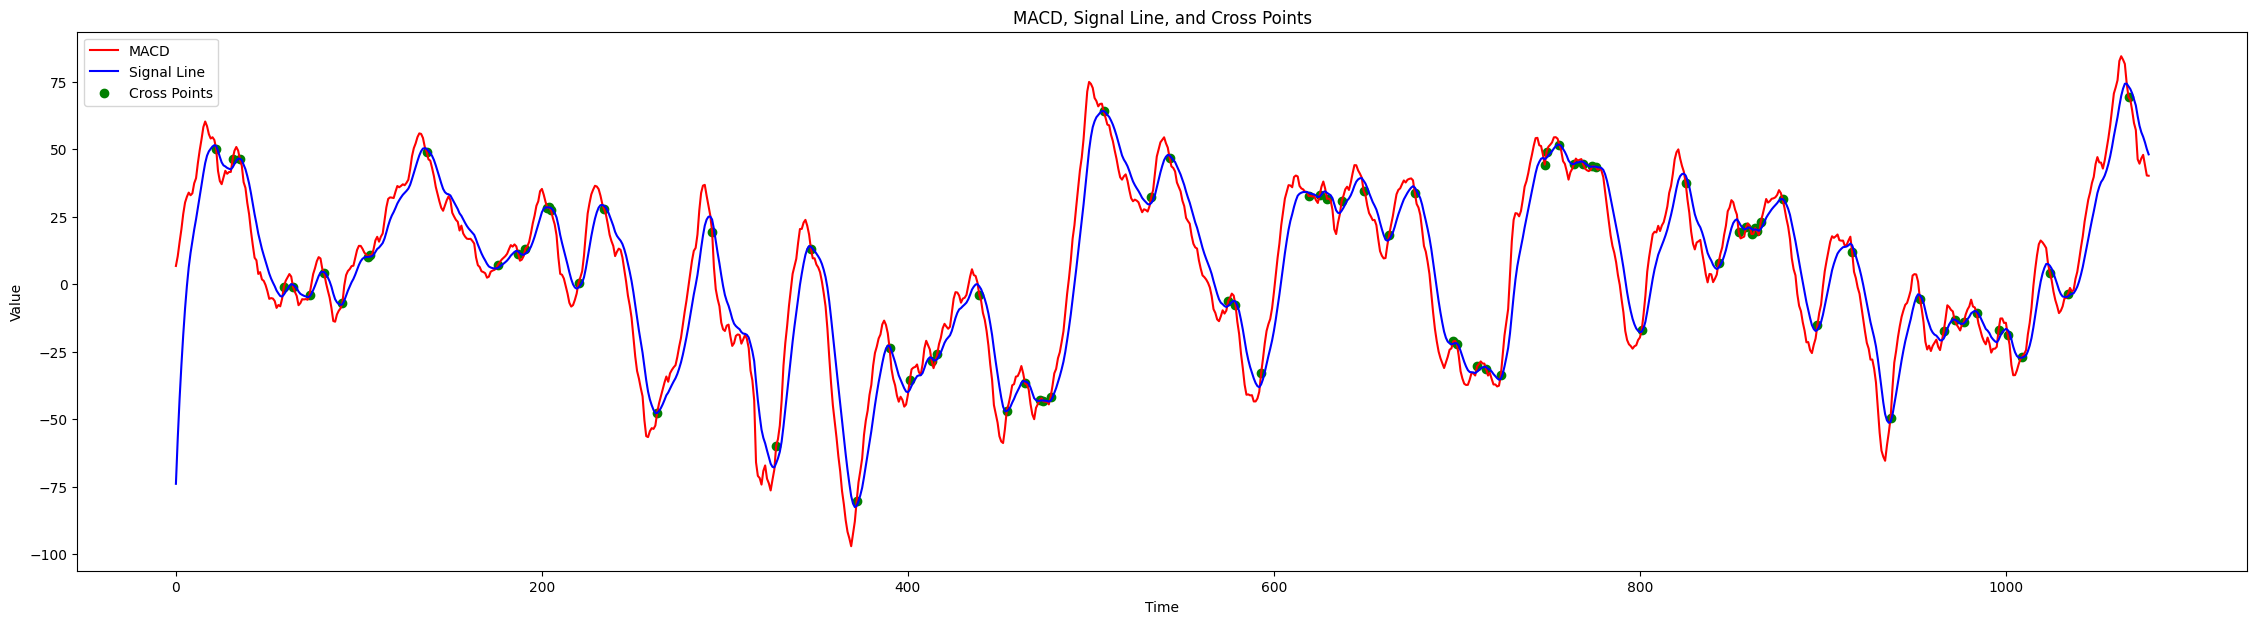

In [18]:
# Plot the MACD, Signal Line, and Cross Points
plot_macd_signal_and_cross_points(macd, signal, cross_points)

2. Calculate the buy and sell signals
- Buy signal: when the MACD line crosses the signal line from below to above
- Sell signal: when the MACD line crosses the signal line from above to below


In [19]:
def calculate_buy_sell_signals(macd, signal):
    """
    Calculate the buy and sell signals based on the MACD and Signal Line
    Buy and Sell signals are calculated as follows:
    - Buy Signal: MACD crosses above the Signal Line
    - Sell Signal: MACD crosses below the Signal Line
    Parameters
    ----------
    macd : numpy array of MACD values
    signal : numpy array of Signal Line values

    Returns
    -------
    buy_signals : list of tuples containing the index and value of the buy signals
    sell_signals : list of tuples containing the index and value of the sell signals
    """
    buy_signals = []
    sell_signals = []
    for i in range(1, len(macd)):
        if macd[i] > signal[i] and macd[i - 1] < signal[i - 1]:
            buy_signals.append((i, macd[i]))
        elif macd[i] < signal[i] and macd[i - 1] > signal[i - 1]:
            sell_signals.append((i, macd[i]))
    return buy_signals, sell_signals

In [20]:
# Calculate the buy and sell signals
buy_signals, sell_signals = calculate_buy_sell_signals(macd, signal)

In [21]:
def plotting_buy_sell_signals(macd, signal, buy_signals, sell_signals):
    """
    Plot the MACD, Signal Line, Buy Signals, and Sell Signals
    Parameters
    ----------
    macd : numpy array of MACD values
    signal : numpy array of Signal Line values
    buy_signals : list of tuples containing the index and value of the buy signals
    sell_signals : list of tuples containing the index and value of the sell signals
    """
    plt.figure(figsize=(28, 7))
    plt.plot(macd, label='MACD', color='blue', linewidth=1, linestyle='--')
    plt.plot(signal, label='Signal Line', color='red', linewidth=1, linestyle='--')
    plt.scatter([point[0] for point in buy_signals], [point[1] for point in buy_signals], color='green', marker='^',
                label='Buy Signals')
    plt.scatter([point[0] for point in sell_signals], [point[1] for point in sell_signals], color='red', marker='v',
                label='Sell Signals')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('MACD, Signal Line, and Cross Points')
    plt.legend()
    plt.show()

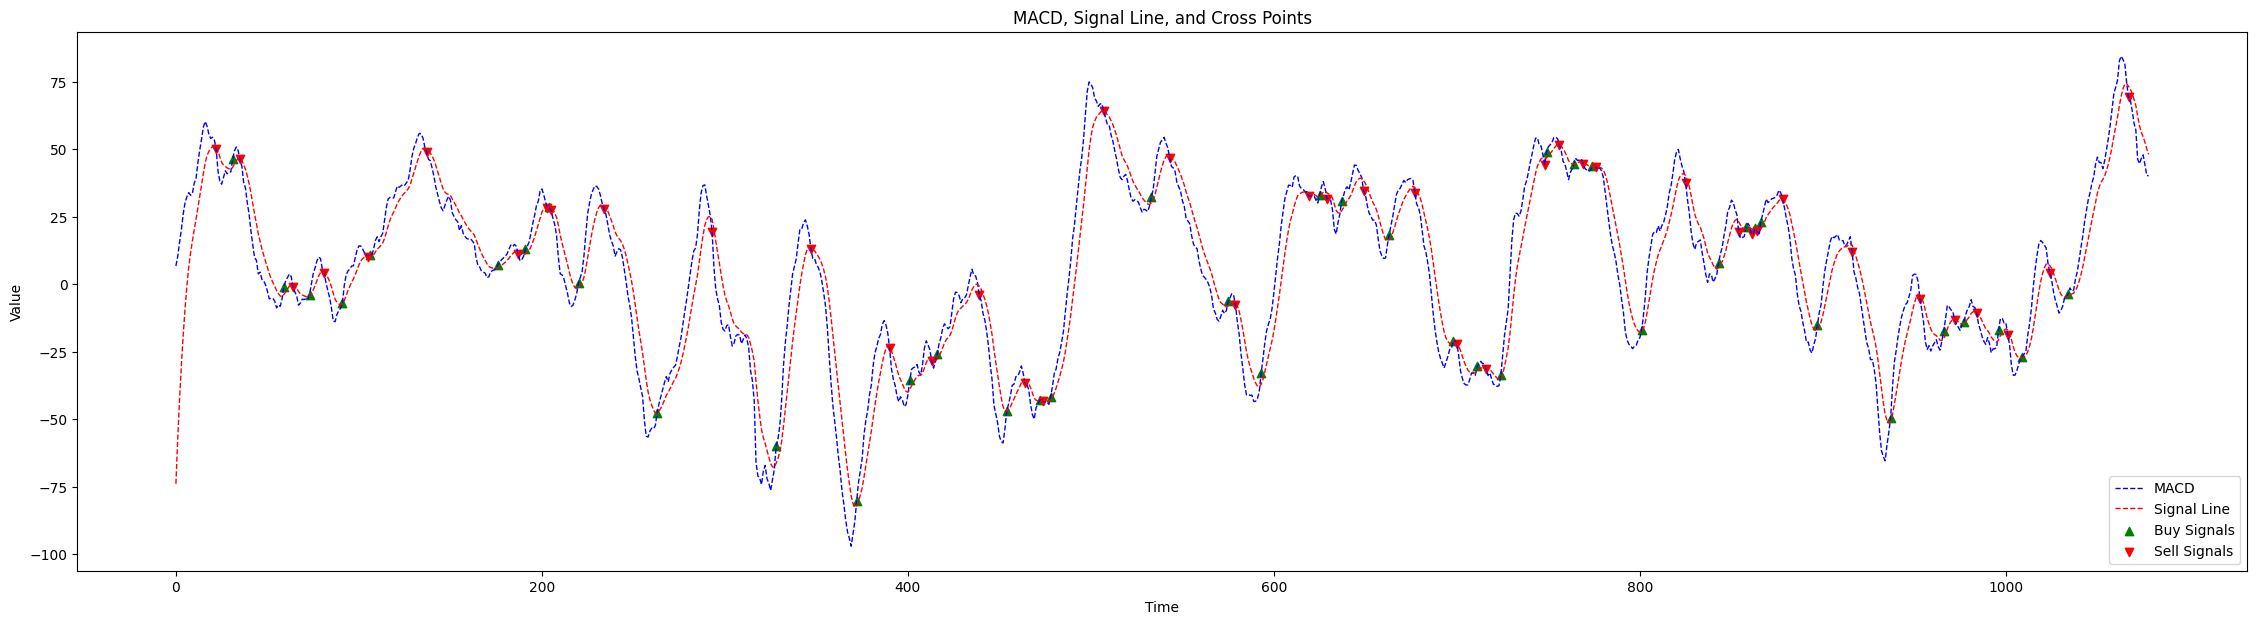

In [22]:
# Plot the MACD, Signal Line, Buy Signals, and Sell Signals
plotting_buy_sell_signals(macd, signal, buy_signals, sell_signals)

#### Buy and sell signals for given period of time

In [23]:
def plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, starting_date, ending_date):
    """
    Plot the MACD, Signal Line, Buy Signals, and Sell Signals for a given period
    Parameters
    ----------
    data : pandas.DataFrame
        The data containing the dates and closing prices
    macd : numpy.array
        The MACD values
    signal : numpy.array
        The Signal Line values
    buy_signals : list of tuples
        The buy signals as (index, value) tuples
    sell_signals : list of tuples
        The sell signals as (index, value) tuples
    starting_date : str
        The starting date of the period to plot
    ending_date : str
        The ending date of the period to plot

    Returns
    -------
    None
    """
    # Convert the starting and ending dates to datetime objects
    starting_date = pd.to_datetime(starting_date)
    ending_date = pd.to_datetime(ending_date)

    # Filter the data for the given period
    mask = (data['Data'] >= starting_date) & (data['Data'] <= ending_date)
    filtered_data = data.loc[mask]

    # Calculate the indices for the filtered data
    start_idx = data.index.get_loc(filtered_data.index[0])
    end_idx = data.index.get_loc(filtered_data.index[-1]) + 1

    # Filter the MACD and Signal values for the given period
    filtered_macd = macd[start_idx:end_idx]
    filtered_signal = signal[start_idx:end_idx]

    # Create a new figure for the plot
    plt.figure(figsize=(28, 10))

    # Plot the MACD and Signal Line
    plt.plot(filtered_data['Data'], filtered_macd, label='MACD', color='blue', linewidth=1, linestyle='--')
    plt.plot(filtered_data['Data'], filtered_signal, label='Signal Line', color='red', linewidth=1, linestyle='--')

    # Extract the buy and sell dates and values for the given period
    buy_dates = [data['Data'].iloc[point[0]] for point in buy_signals if starting_date <= data['Data'].iloc[point[0]] <= ending_date]
    buy_values = [point[1] for point in buy_signals if starting_date <= data['Data'].iloc[point[0]] <= ending_date]
    sell_dates = [data['Data'].iloc[point[0]] for point in sell_signals if starting_date <= data['Data'].iloc[point[0]] <= ending_date]
    sell_values = [point[1] for point in sell_signals if starting_date <= data['Data'].iloc[point[0]] <= ending_date]

    # Plot the buy and sell signals
    plt.scatter(buy_dates, buy_values, color='green', marker='^', label='Buy Signals')
    plt.scatter(sell_dates, sell_values, color='red', marker='v', label='Sell Signals')

    # Add text for buy signals
    for date, value in zip(buy_dates, buy_values):
        closing_price = data.loc[data['Data'] == date, 'Zamkniecie'].values[0]
        plt.text(date, value, f'{closing_price:.2f}', color='green', fontsize=10, ha='center', va='bottom')

    # Add text for sell signals
    for date, value in zip(sell_dates, sell_values):
        closing_price = data.loc[data['Data'] == date, 'Zamkniecie'].values[0]
        plt.text(date, value, f'{closing_price:.2f}', color='red', fontsize=10, ha='center', va='top')

    # Set the x-axis to display days
    plt.gca().xaxis.set_major_locator(mdates.DayLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.xticks(rotation=90)

    # Set the labels and title of the plot
    plt.xlabel('Data')
    plt.title(f'Wykres MACD / SIGNAL dla WIG20 dla okresu od {starting_date.strftime("%Y-%m-%d")} do {ending_date.strftime("%Y-%m-%d")}', fontsize=20)
    plt.legend()

    # Display the plot
    plt.show()

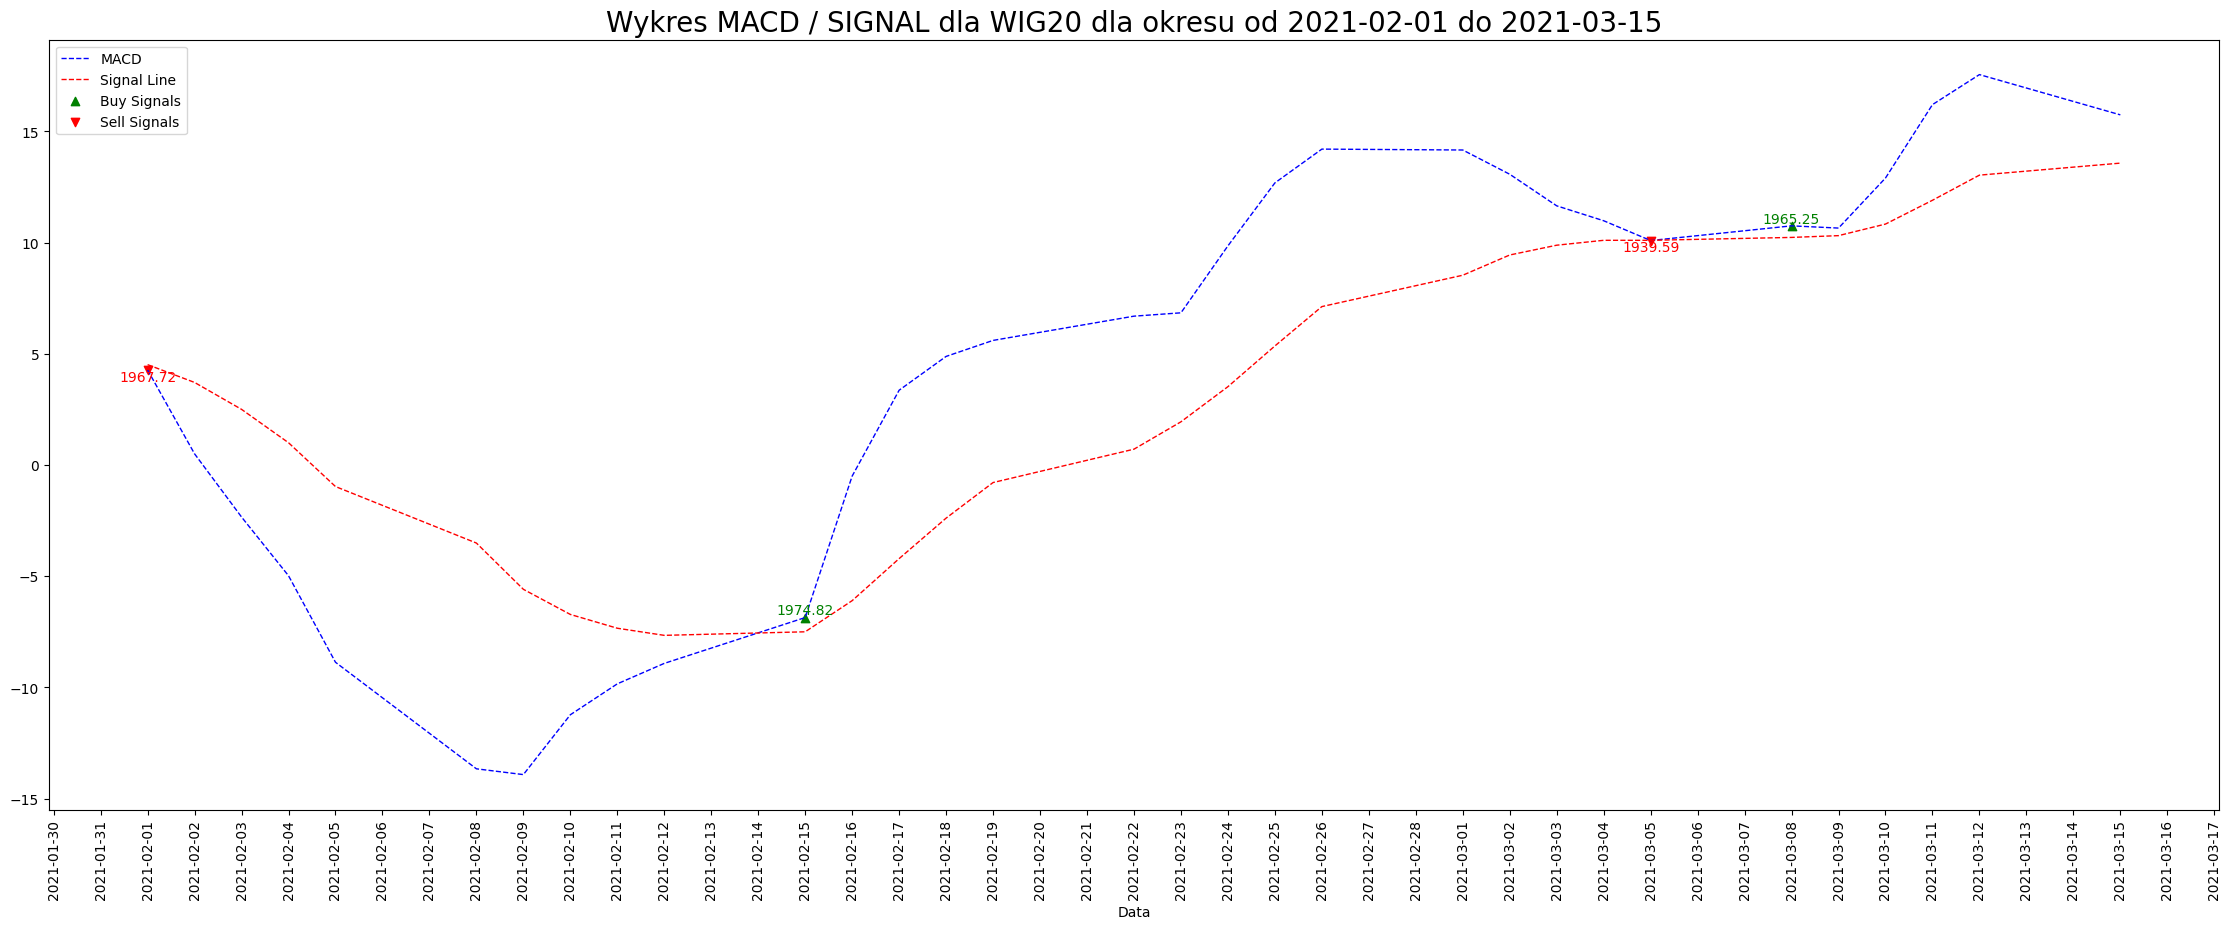

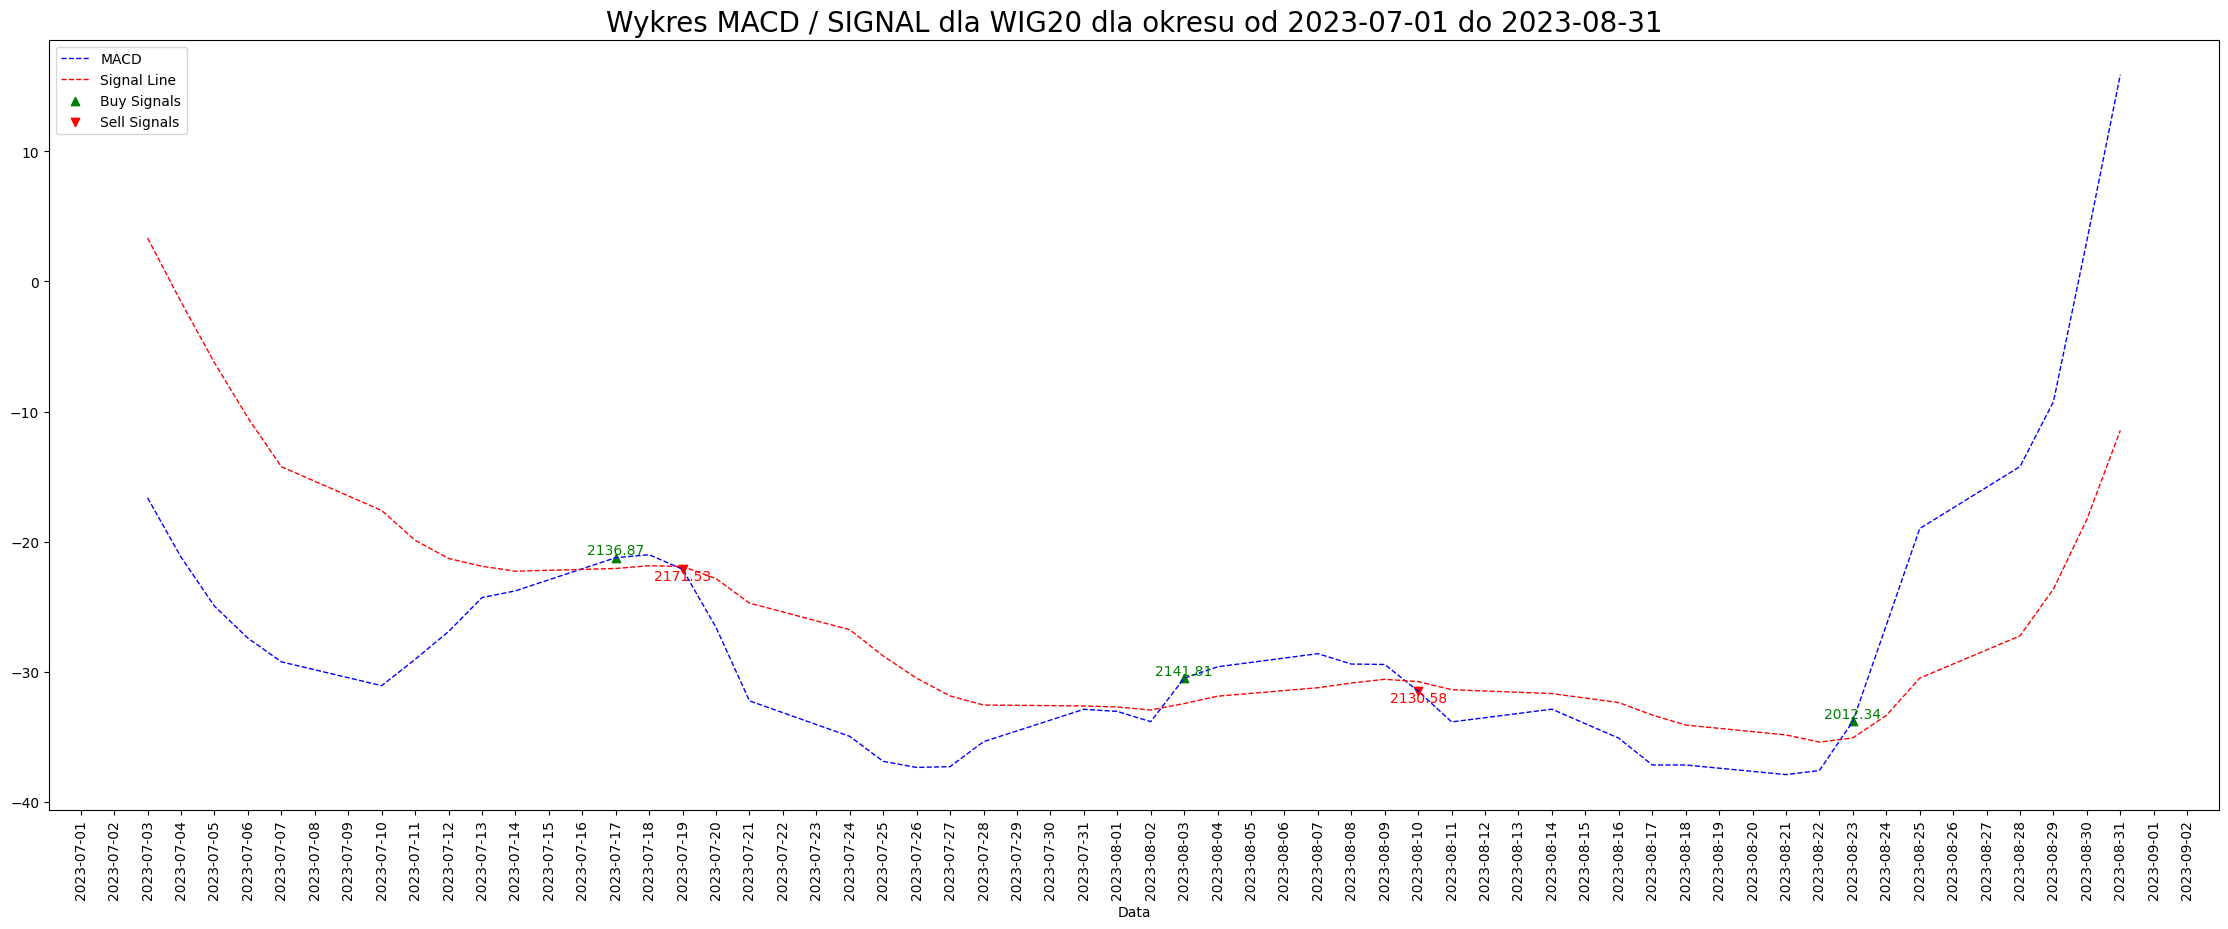

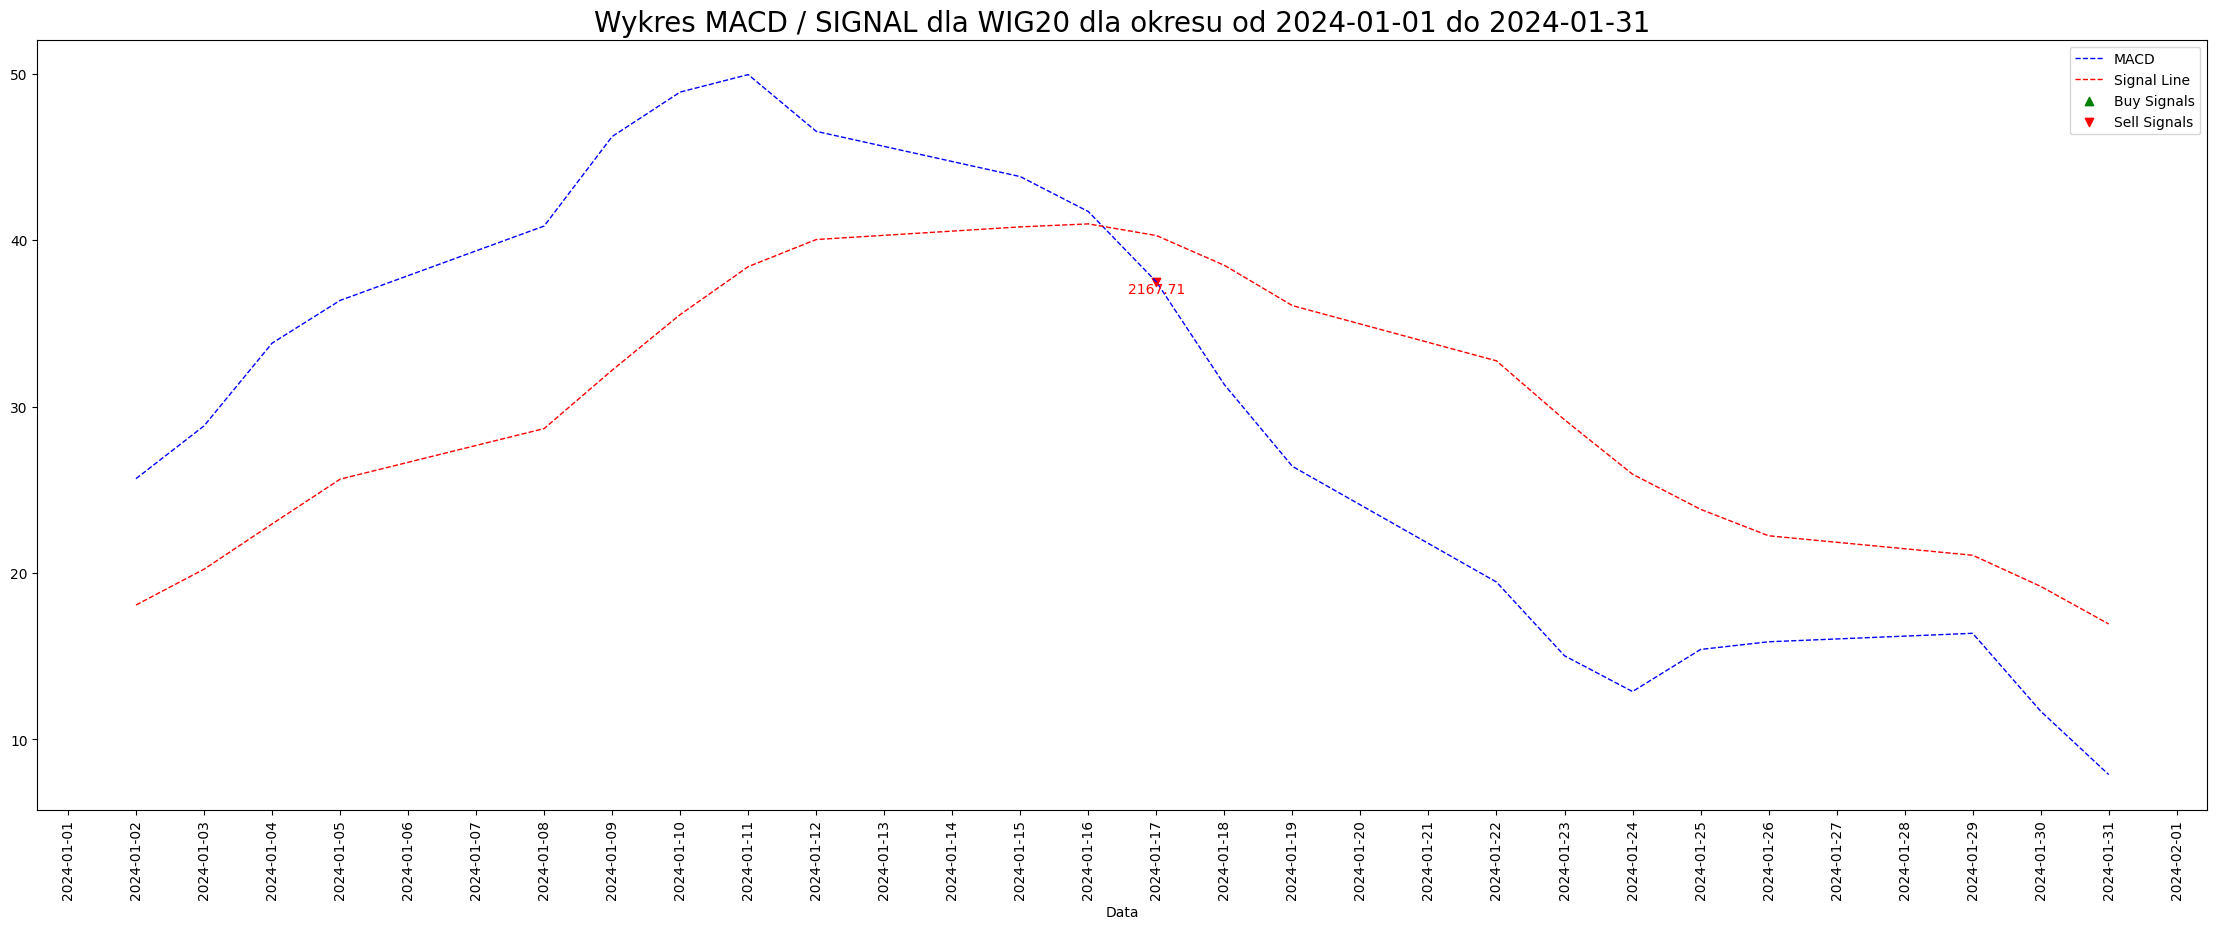

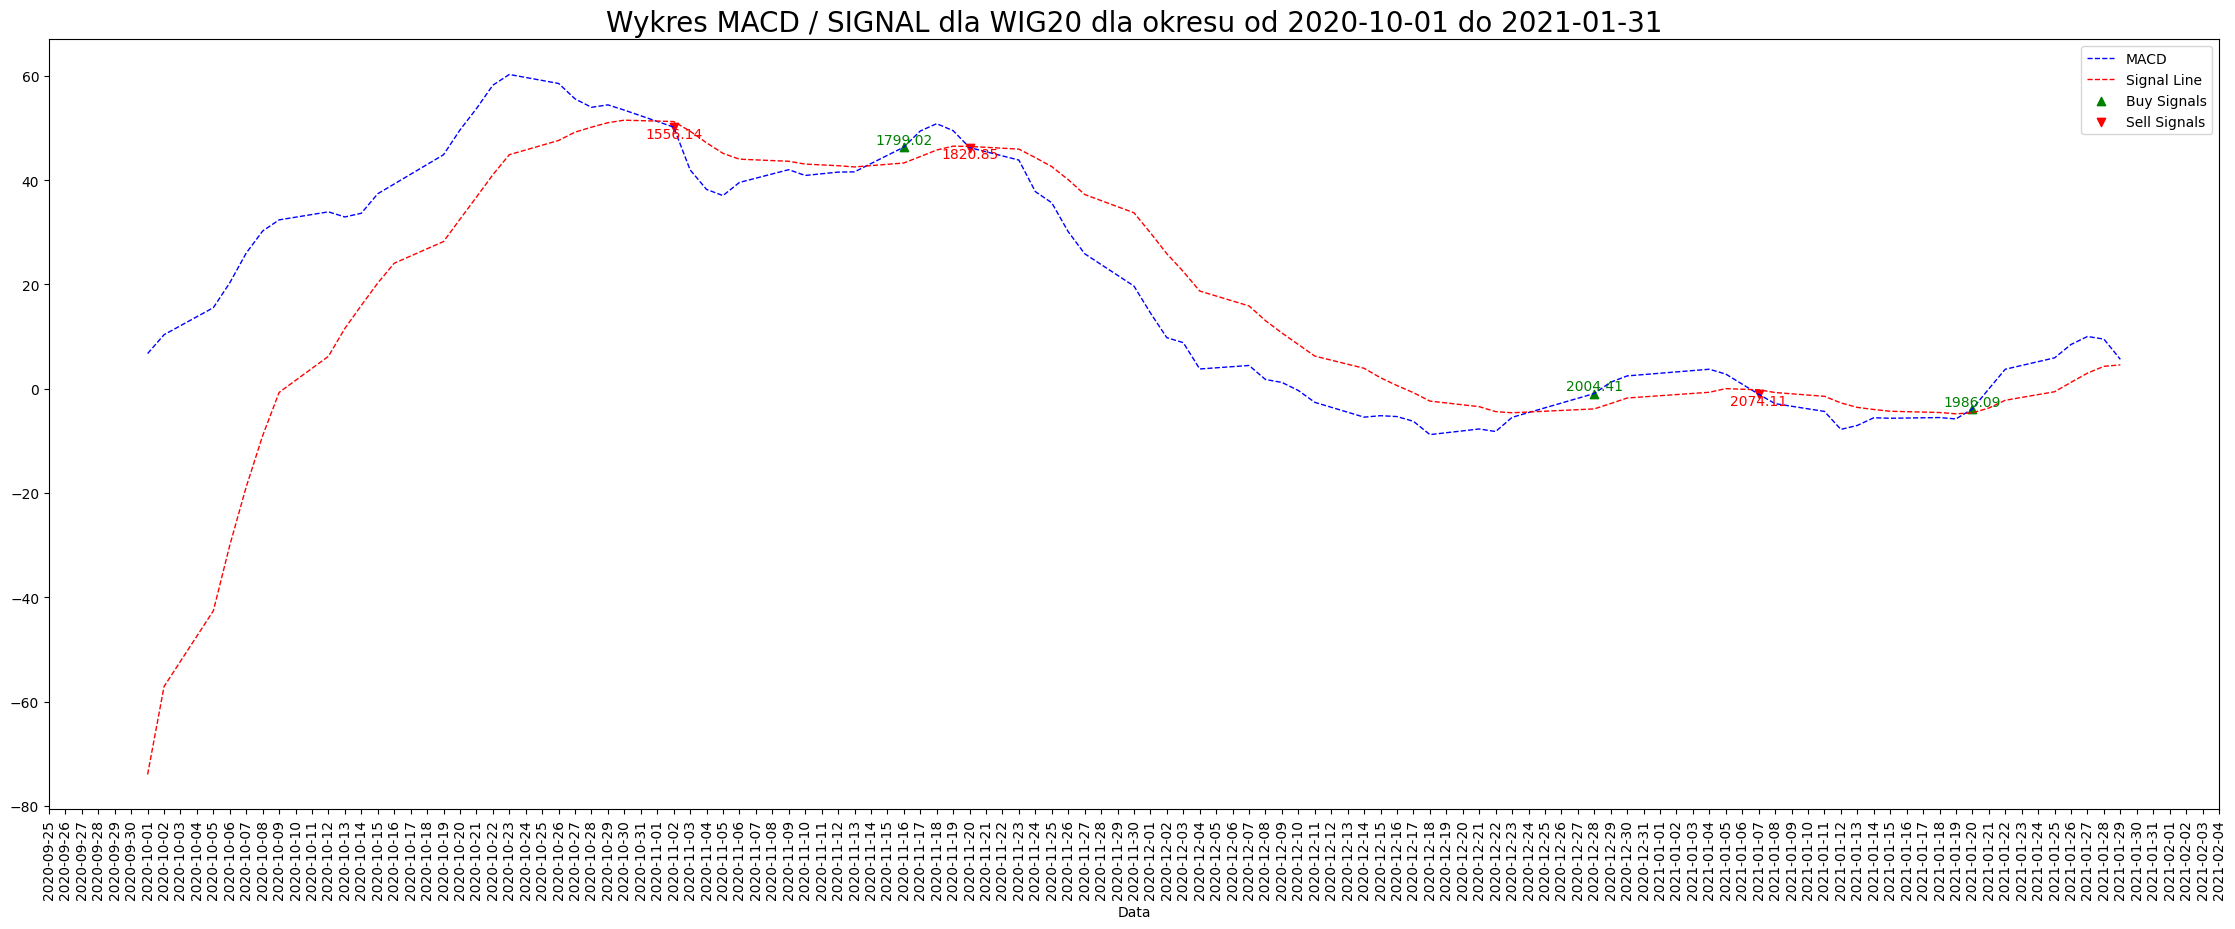

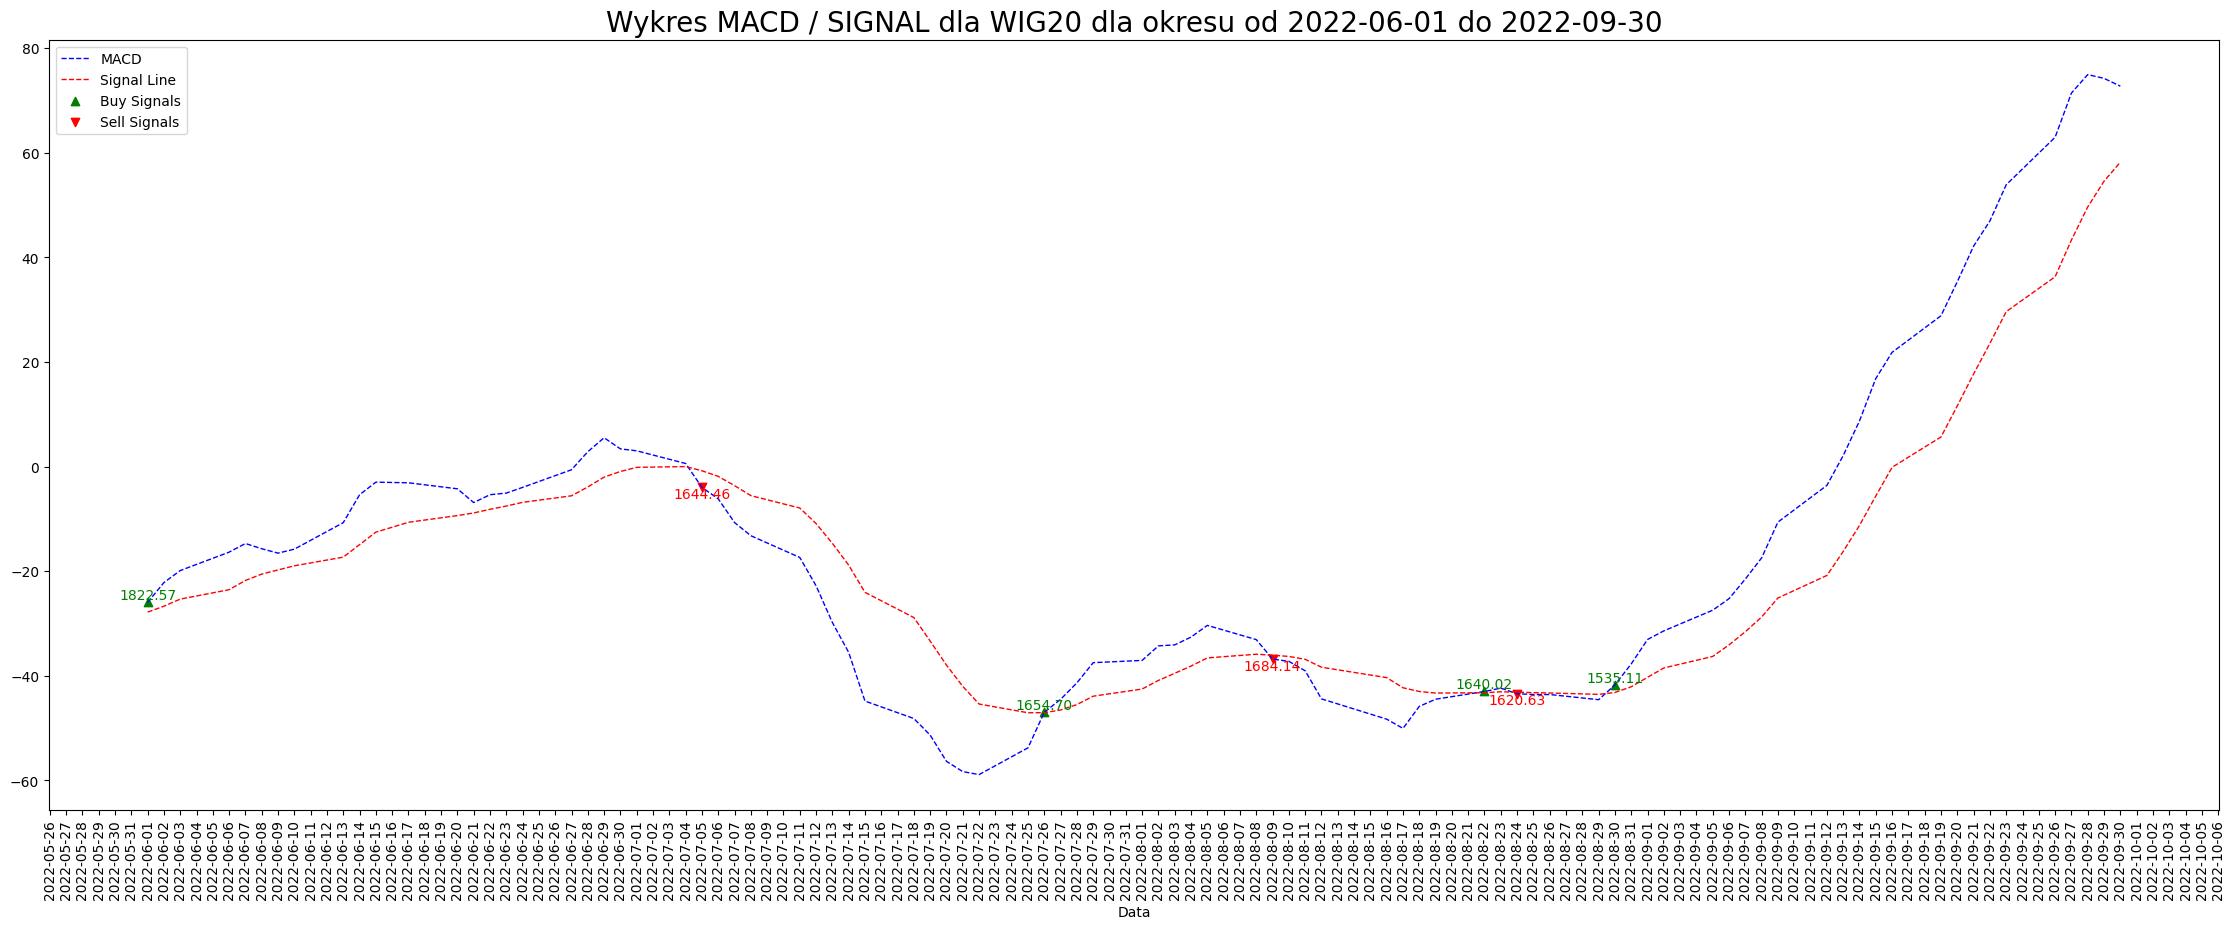

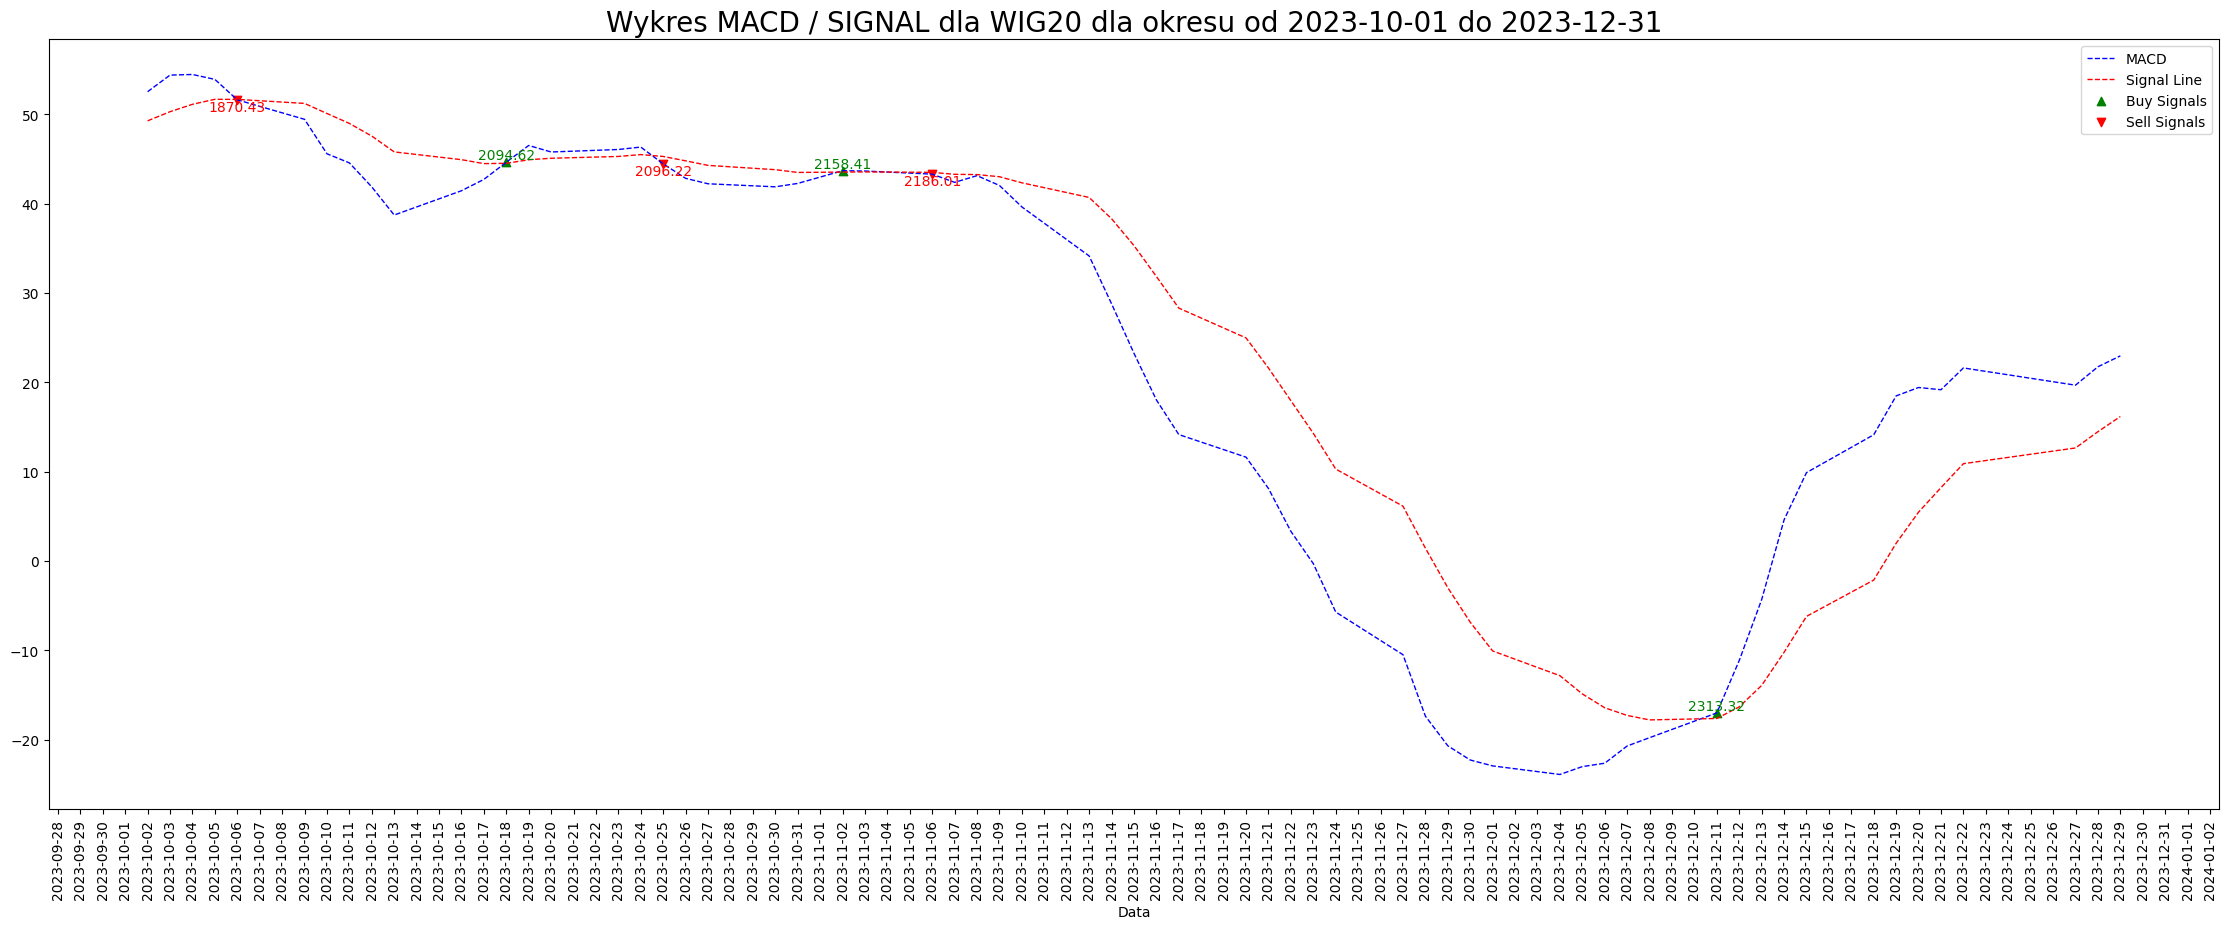

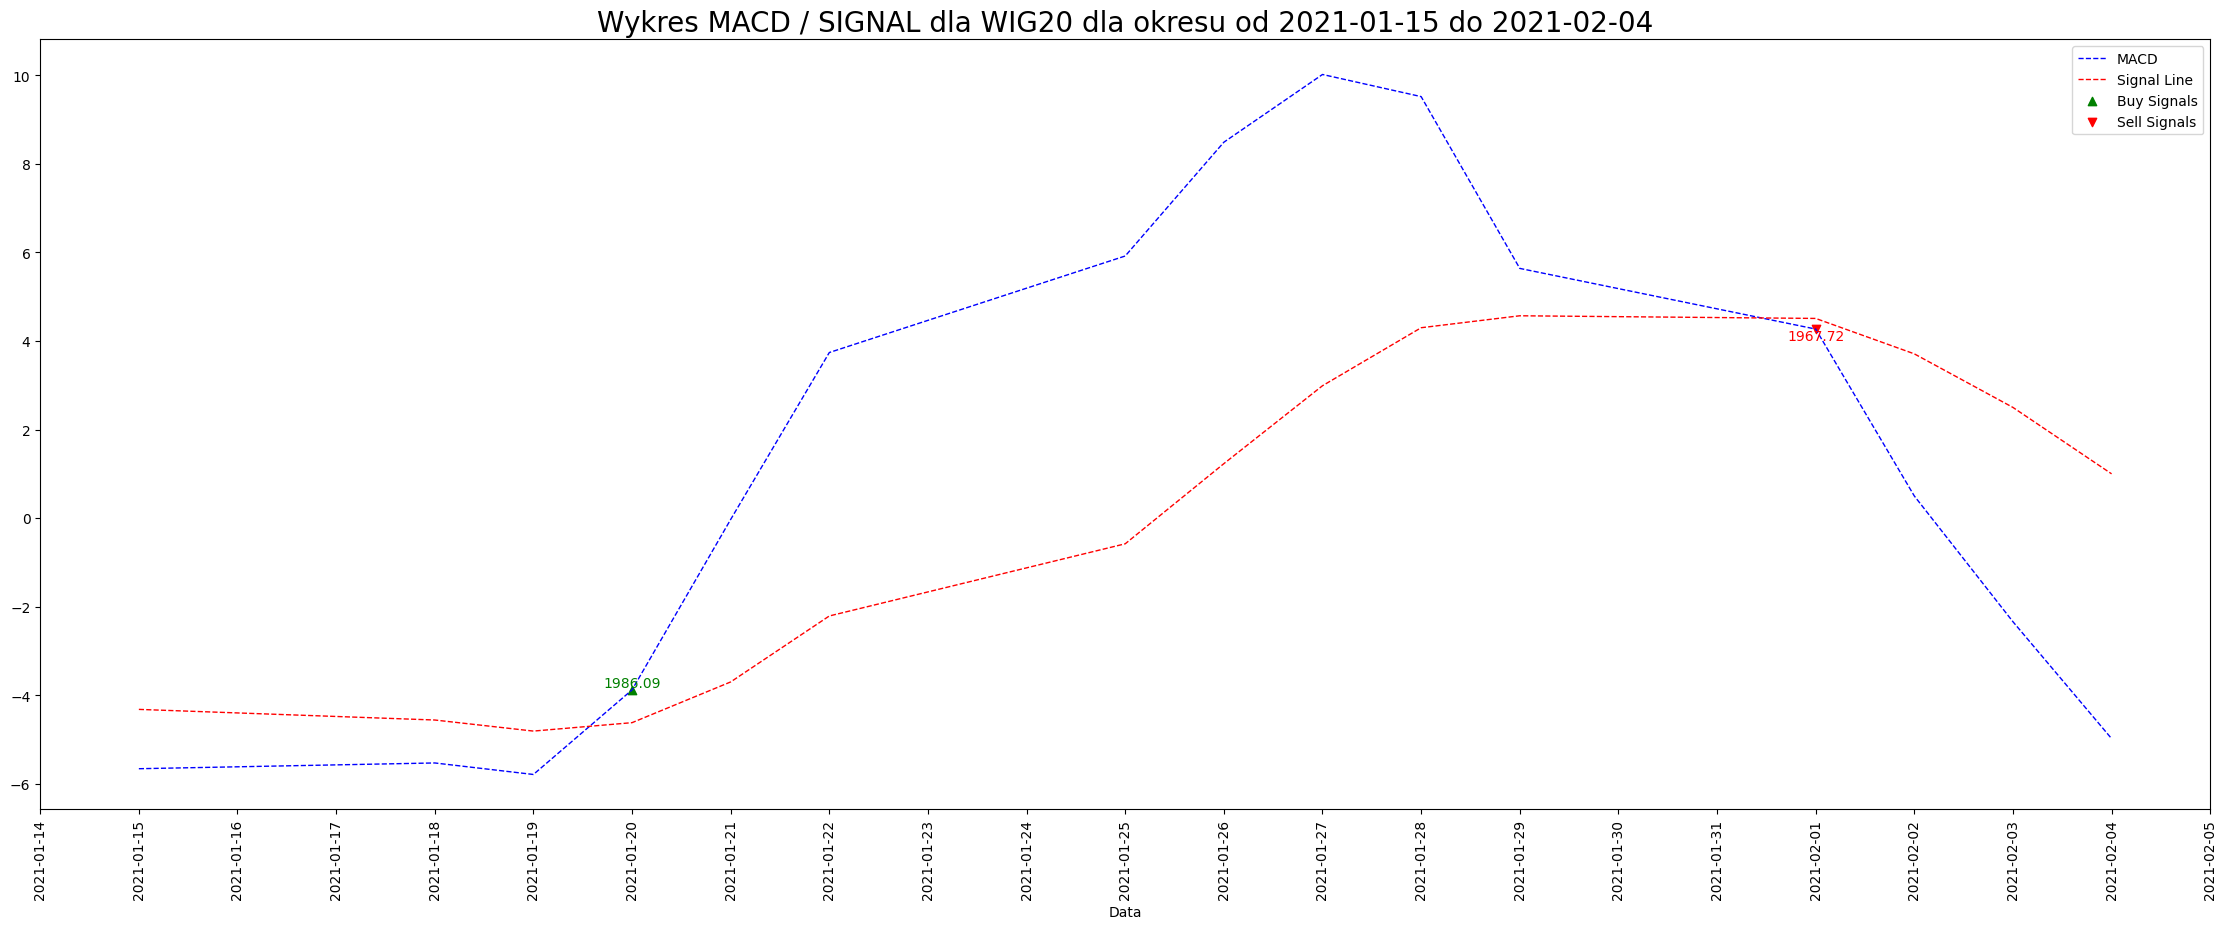

In [24]:
# Plot the MACD, Signal Line, Buy Signals, and Sell Signals for a given period
# Plot the MACD, Signal Line, Buy Signals, and Sell Signals for a given period
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2021-02-01', '2021-03-15')
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2023-07-01', '2023-08-31')
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2024-01-01', '2024-01-31')
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2020-10-01', '2021-01-31')
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2022-06-01', '2022-09-30')
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2023-10-01', '2023-12-31')
plotting_buy_sell_signals_for_given_period(data, macd, signal, buy_signals, sell_signals, '2021-01-15', '2021-02-04')
